In [2]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib as mlp
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
mlp.style.use("seaborn")
import statsmodels
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

In [9]:
df_acc = pd.read_csv("../data/ie_accounting.csv")
df_acc["10 year anualized stock real return float"] = df_acc["10 year anualized stock real return float"]/100
print(df_acc.columns)
df_acc.head()

Index(['Unnamed: 0', 'Date_x', 'P', 'D', 'E', 'CPI', 'Date Fraction',
       'Long Interest Rate GS10', 'Real Price', 'Real Dividend',
       'Real TR Price ', 'Real Earnings', 'Real TR Scaled  Earnings ', 'CAPE',
       'TR CAPE', 'Excess CAPE Yield', 'Monthly Total Bond Returns',
       'Real Total BondReturns', '10 year anualized stock real return',
       '10 year annualized Real Return',
       'Real 10 year excess annualizedReturns', 'Real TR Price  float',
       'Real TR Scaled  Earnings  float', 'Excess CAPE Yield float',
       '10 year anualized stock real return float',
       '10 year annualized Real Return float',
       'Real 10 year excess annualizedReturns float', 'proxy', 'Date_y', 'PFE',
       'Real PFE', 'PFE10', 'Accounting Adjusted CAPE'],
      dtype='object')


,Unnamed: 0,Date_x,P,D,E,CPI,Date Fraction,Long Interest Rate GS10,Real Price,Real Dividend,...,Excess CAPE Yield float,10 year anualized stock real return float,10 year annualized Real Return float,Real 10 year excess annualizedReturns float,proxy,Date_y,PFE,Real PFE,PFE10,Accounting Adjusted CAPE
0,0,1871.01,4.44,0.26,0.4,12.46,1871.04,5.32,97.25,5.69,...,NaN,0.1306,9.25,3.81,187104,NaN,0.4,8.76,NaN,NaN
1,1,1871.02,4.50,0.26,0.4,12.84,1871.13,5.32,95.64,5.53,...,NaN,0.1309,9.46,3.62,187113,NaN,0.4,8.50,NaN,NaN
2,2,1871.03,4.61,0.26,0.4,13.03,1871.21,5.33,96.55,5.45,...,NaN,0.1310,9.62,3.48,187121,NaN,0.4,8.38,NaN,NaN
3,3,1871.04,4.74,0.26,0.4,12.56,1871.29,5.33,103.03,5.65,...,NaN,0.1221,9.10,3.11,187129,NaN,0.4,8.69,NaN,NaN
4,4,1871.05,4.86,0.26,0.4,12.27,1871.38,5.33,108.10,5.78,...,NaN,0.1226,8.95,3.31,187138,NaN,0.4,8.90,NaN,NaN


### Modified CAPE

In [14]:
# period from 1881-2006
split_period = 2007.01
x = np.log((np.array(df_acc[(df_acc["Date_x"]<split_period)]["Accounting Adjusted CAPE"]).astype(float)))
x = sm.add_constant(x)
y = np.array(df_acc[(df_acc["Date_x"]<split_period)]["10 year anualized stock real return float"]).astype(float)

model = sm.OLS(y, x, missing="drop")
summary = model.fit()
print(summary.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     807.1
Date:                Thu, 02 Dec 2021   Prob (F-statistic):          1.32e-142
Time:                        03:01:00   Log-Likelihood:                 2650.3
No. Observations:                1513   AIC:                            -5297.
Df Residuals:                    1511   BIC:                            -5286.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2779      0.008     36.627      0.0

In [13]:
# period 2007-2021
split_period = 2007.01
x = np.log((np.array(df_acc[(df_acc["Date_x"]>=split_period)]["Accounting Adjusted CAPE"]).astype(float)))
x = sm.add_constant(x)
y = np.array(df_acc[(df_acc["Date_x"]>=split_period)]["10 year anualized stock real return float"]).astype(float)

model = sm.OLS(y, x, missing="drop")
summary = model.fit()
print(summary.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     160.5
Date:                Thu, 02 Dec 2021   Prob (F-statistic):           8.30e-18
Time:                        03:00:54   Log-Likelihood:                 160.08
No. Observations:                  56   AIC:                            -316.2
Df Residuals:                      54   BIC:                            -312.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4391      0.027     16.358      0.0

In [15]:
# overall period
x = np.log((np.array(df_acc["Accounting Adjusted CAPE"]).astype(float)))
x = sm.add_constant(x)
y = np.array(df_acc["10 year anualized stock real return float"]).astype(float)

model = sm.OLS(y, x, missing="drop")
summary = model.fit()
print(summary.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     778.4
Date:                Thu, 02 Dec 2021   Prob (F-statistic):          2.05e-139
Time:                        03:52:59   Log-Likelihood:                 2736.7
No. Observations:                1569   AIC:                            -5469.
Df Residuals:                    1567   BIC:                            -5459.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2756      0.008     36.286      0.0

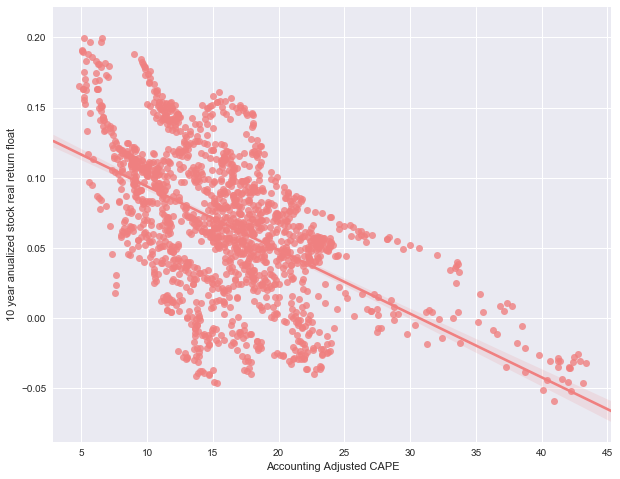

In [16]:
plt.figure(figsize=(10, 8))
sns.regplot(df_acc["Accounting Adjusted CAPE"], 
            df_acc["10 year anualized stock real return float"], 
            label="Real Returns", 
            color='lightcoral')